# Ejemplo de Redes Neuronales

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# The Sequential model API

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#### Build a convolutional neural network model

In [3]:
model = Sequential([
    Flatten(input_shape = (28,28), name="input"),
    Dense(16, activation="relu"),                  
    Dense(16, activation="relu"),                  
    Dense(10, activation="softmax", name="output")                                     
])

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Flatten)             (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [5]:
# Define the model optimizer, loss function and metrics
# define optimizer as an objetc
opt = tf.keras.optimizers.Adam(learning_rate=.0005)
acc = tf.keras.metrics.SparseCategoricalAccuracy() #Usado para etiquetas Y de tipo entero en lugar de tipo one-hot encode
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer = opt,
              loss = 'sparse_categorical_crossentropy',
              metrics = [acc, mae]
              )


In [6]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics_names)
print(model.optimizer.learning_rate)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [7]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [8]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)
train_labels

(60000, 28, 28)
(60000,)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [11]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

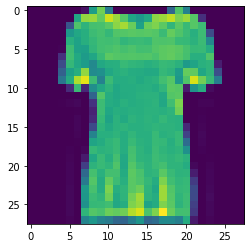

label : T-shirt/top


In [12]:
# Display one of the images
plt.imshow(train_images[10])
plt.show()
print(f"label : {labels[train_labels[10]]}")

#### Fit the model

In [13]:
train_images

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
# Fit the model
history = model.fit(train_images,train_labels, batch_size= 256, epochs= 20)


Epoch 1/20
235/235 [==============================] - 4s 3ms/step - loss: 1.2045 - sparse_categorical_accuracy: 0.5908 - mean_absolute_error: 4.4200
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.6428 - sparse_categorical_accuracy: 0.7839 - mean_absolute_error: 4.4200
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5442 - sparse_categorical_accuracy: 0.8143 - mean_absolute_error: 4.4200
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4915 - sparse_categorical_accuracy: 0.8309 - mean_absolute_error: 4.4200
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4593 - sparse_categorical_accuracy: 0.8418 - mean_absolute_error: 4.4200
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4413 - sparse_categorical_accuracy: 0.8474 - mean_absolute_error: 4.4200
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.4272 - sparse_categorical_accu

#### Plot training history

In [15]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df

,loss,sparse_categorical_accuracy,mean_absolute_error
0,1.204529,0.590817,4.420001
1,0.642772,0.783933,4.420001
2,0.544236,0.814317,4.419999
3,0.491475,0.830900,4.420001
4,0.459331,0.841800,4.420000
5,0.441318,0.847433,4.420000
6,0.427191,0.852300,4.420001
7,0.416337,0.855350,4.420000
8,0.408411,0.858367,4.420001
9,0.400942,0.860183,4.419999


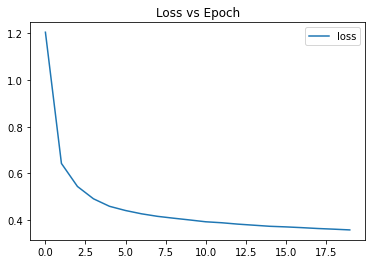

In [16]:
# Make a plot for the loss

df.plot( y = "loss", title = "Loss vs Epoch")



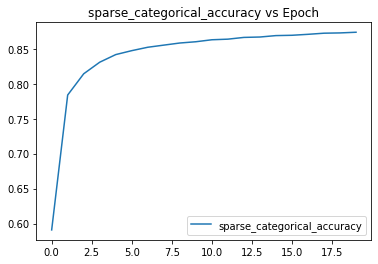

In [17]:
# Make a plot for the accuracy

df.plot( y = "sparse_categorical_accuracy", title = "sparse_categorical_accuracy vs Epoch")



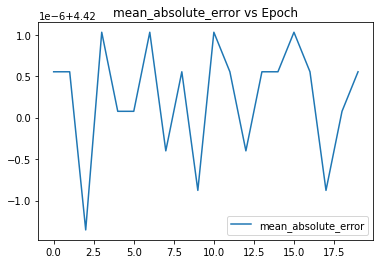

In [18]:
# Make a plot for the additional metric
df.plot( y = "mean_absolute_error", title = "mean_absolute_error vs Epoch")



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [20]:
print(test_images.shape)

(10000, 28, 28)


In [21]:
# Evaluate the model
loss, accuracy, mae = model.evaluate(test_images, test_labels)
print("loss", loss)
print("acc", accuracy)
print("mae", mae)

313/313 [==============================] - 1s 2ms/step - loss: 0.4098 - sparse_categorical_accuracy: 0.8584 - mean_absolute_error: 4.4200
loss 0.40978705883026123
acc 0.8583999872207642
mae 4.419997215270996


#### Make predictions from the model

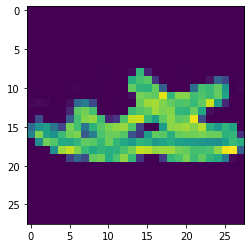

Label: Sandal


In [22]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [23]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print("Model", labels[np.argmax(pred)])

Model Sandal


In [24]:
pred

array([[4.12033251e-06, 1.35546374e-09, 1.99851070e-06, 1.08614294e-07,
        4.45860984e-08, 9.98892963e-01, 2.53324324e-05, 4.76738758e-04,
        2.55058956e-04, 3.43839492e-04]], dtype=float32)

In [25]:
import pandas as pd
df = pd.DataFrame(pred)
df

,0,1,2,3,4,5,6,7,8,9
0,0.000004,1.355464e-09,0.000002,1.086143e-07,4.458610e-08,0.998893,0.000025,0.000477,0.000255,0.000344


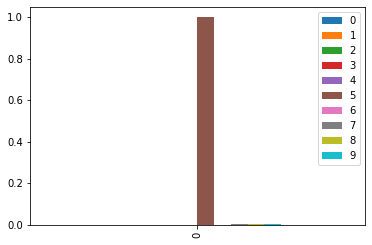

In [26]:
df.plot.bar()